In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import random
from itertools import combinations
from helpers import read_from_csv, discretize, plot_data, result_to_df, plot_result_directed, plot_result_undirected, calculate_rates_directed, calculate_rates_undirected
from models import correlation_model, random_model, aracne_model

In [2]:
# read raw data from CSV file:
gene_df = read_from_csv('gene-data.csv')

# discretize data into 5 bins of gene-specific limits:
gene_df_disc = discretize(gene_df,5)

# true network structure:
# ground_truth[i,j]=1 -> directed edge between gene i and gene j
ground_truth = result_to_df(np.array([[0,1,0,0,0],
                                      [0,0,1,0,0],
                                      [0,0,0,0,1],
                                      [0,0,0,0,0],
                                      [1,1,0,1,0]]))

In [ ]:
gene_df.head()
gene_df_disc.head()

In [ ]:
plot_data(gene_df, discr=False)
plot_data(gene_df_disc, discr=True)

In [ ]:
corr_mat = correlation_model(gene_df, threshold=0.75)

In [ ]:
plot_result_directed(corr_mat)
plot_result_directed(ground_truth)
tpr,fpr = calculate_rates_directed(df_to_try=corr_mat, df_true=ground_truth)
print('directed TPR = {:.3f} and FPR = {:.3f}'.format(tpr,fpr))

In [ ]:
plot_result_undirected(corr_mat)
plot_result_undirected(ground_truth)
tpr,fpr = calculate_rates_undirected(df_to_try=corr_mat, df_true=ground_truth)
print('undirected TPR = {:.3f} and FPR = {:.3f}'.format(tpr,fpr))

In [ ]:
random_mat = random_model(threshold=0.5)
# random_mat = random_model(n_edges=6)

In [ ]:
plot_result_directed(random_mat)
plot_result_directed(ground_truth)
tpr,fpr = calculate_rates_directed(df_to_try=random_mat, df_true=ground_truth)
print('directed TPR = {:.3f} and FPR = {:.3f}'.format(tpr,fpr))

In [20]:
aracne_mat = aracne_model(gene_df, discr_bins=5, threshold=0, remove=False)
aracne_mat

,ASH1,CBF1,GAL4,GAL80,SWI5
ASH1,0,1,1,1,1
CBF1,1,0,1,1,1
GAL4,1,1,0,1,1
GAL80,1,1,1,0,1
SWI5,1,1,1,1,0


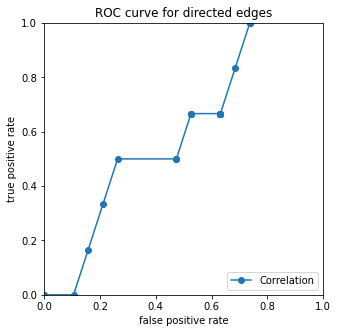

In [52]:
# ROC curve for correlation model
thresholds = np.linspace(0, 1, 20)
directed = True

tpr = np.zeros(len(thresholds))
fpr = np.zeros(len(thresholds))
for i, thres in enumerate(thresholds):
    mat = correlation_model(gene_df, threshold=thres)
    if directed:
        tpr[i],fpr[i] = calculate_rates_directed(df_to_try=mat, df_true=ground_truth)
        title = 'ROC curve for directed edges'
    else:
        tpr[i],fpr[i] = calculate_rates_undirected(df_to_try=mat, df_true=ground_truth)
        title = 'ROC curve for undirected edges'
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,"o-")
plt.xlim((0,1))
plt.ylim((0,1))
plt.title(title)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(labels=['Correlation'], loc='lower right');

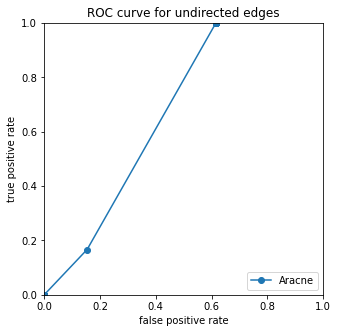

In [56]:
# ROC curve for Aracne model
thresholds = np.linspace(-10, 10, 20)
directed = False
bins_for_discretization = 5
remove_edge_from_triplet = False

tpr = np.zeros(len(thresholds))
fpr = np.zeros(len(thresholds))
for i, thres in enumerate(thresholds):
    mat = aracne_model(gene_df, discr_bins=bins_for_discretization, 
                              threshold=thres, remove=remove_edge_from_triplet)
    if directed:
        tpr[i],fpr[i] = calculate_rates_directed(df_to_try=mat, df_true=ground_truth)
        title = 'ROC curve for directed edges'
    else:
        tpr[i],fpr[i] = calculate_rates_undirected(df_to_try=mat, df_true=ground_truth)
        title = 'ROC curve for undirected edges'
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,"o-")
plt.xlim((0,1))
plt.ylim((0,1))
plt.title(title)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(labels=['Aracne'], loc='lower right');

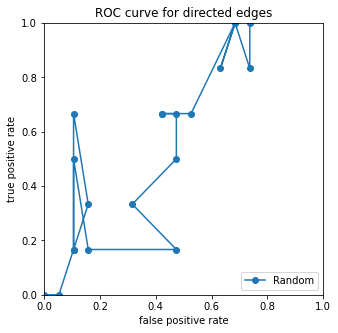

In [61]:
# ROC curve for random model
thresholds = np.linspace(0, 1, 20)
directed = True

tpr = np.zeros(len(thresholds))
fpr = np.zeros(len(thresholds))
for i, thres in enumerate(thresholds):
    mat = random_model(threshold=thres)
    if directed:
        tpr[i],fpr[i] = calculate_rates_directed(df_to_try=mat, df_true=ground_truth)
        title = 'ROC curve for directed edges'
    else:
        tpr[i],fpr[i] = calculate_rates_undirected(df_to_try=mat, df_true=ground_truth)
        title = 'ROC curve for undirected edges'
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,"o-")
plt.xlim((0,1))
plt.ylim((0,1))
plt.title(title)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(labels=['Random'], loc='lower right');